### Importing Lib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Loading dataset

In [4]:
product=pd.read_csv('/content/drive/MyDrive/zeotap assignment/Products.csv')
customer=pd.read_csv('/content/drive/MyDrive/zeotap assignment/Customers.csv')
transaction=pd.read_csv('/content/drive/MyDrive/zeotap assignment/Transactions.csv')

In [21]:
customer['SignupDate'] = pd.to_datetime(customer['SignupDate'])
transaction['TransactionDate'] = pd.to_datetime(transaction['TransactionDate'])

In [22]:
transaction

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


##Checking for Missing Value

In [23]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [24]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB


In [25]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB


In [15]:
transaction.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [59]:
product.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [60]:
customer.head()

,CustomerID,CustomerName,Region,SignupDate,YearMonth
0,C0001,Lawrence Carroll,South America,2022-07-10,2022-07
1,C0002,Elizabeth Lutz,Asia,2022-02-13,2022-02
2,C0003,Michael Rivera,South America,2024-03-07,2024-03
3,C0004,Kathleen Rodriguez,South America,2022-10-09,2022-10
4,C0005,Laura Weber,Asia,2022-08-15,2022-08


In [32]:
product['ProductID'].nunique()

100

In [18]:
product.applymap(lambda x: isinstance(x, str) and x.lower() == 'nan').any().any()

<ipython-input-18-75e2155ce4dc>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  product.applymap(lambda x: isinstance(x, str) and x.lower() == 'nan').any().any()


False

In [50]:
customer.applymap(lambda x: isinstance(x, str) and x.lower() == 'nan').any().any()
transaction.applymap(lambda x: isinstance(x, str) and x.lower() == 'nan').any().any()

<ipython-input-50-5abd567e8b51>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  customer.applymap(lambda x: isinstance(x, str) and x.lower() == 'nan').any().any()
<ipython-input-50-5abd567e8b51>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transaction.applymap(lambda x: isinstance(x, str) and x.lower() == 'nan').any().any()


False

no missing value

## Summary Stats

In [52]:
product.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [53]:
transaction.describe()

,TransactionDate,Quantity,TotalValue,Price
count,1000,1000.000000,1000.000000,1000.00000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000
std,NaN,1.117981,493.144478,140.73639


### Merging Dataset

In [27]:
full_data = pd.merge(
    transaction,
    customer[['CustomerID', 'Region', 'SignupDate']],
    on='CustomerID'
)

In [28]:
full_data = pd.merge(
    full_data,
    product[['ProductID', 'Category', 'ProductName']],
    on='ProductID'
)

# EDA

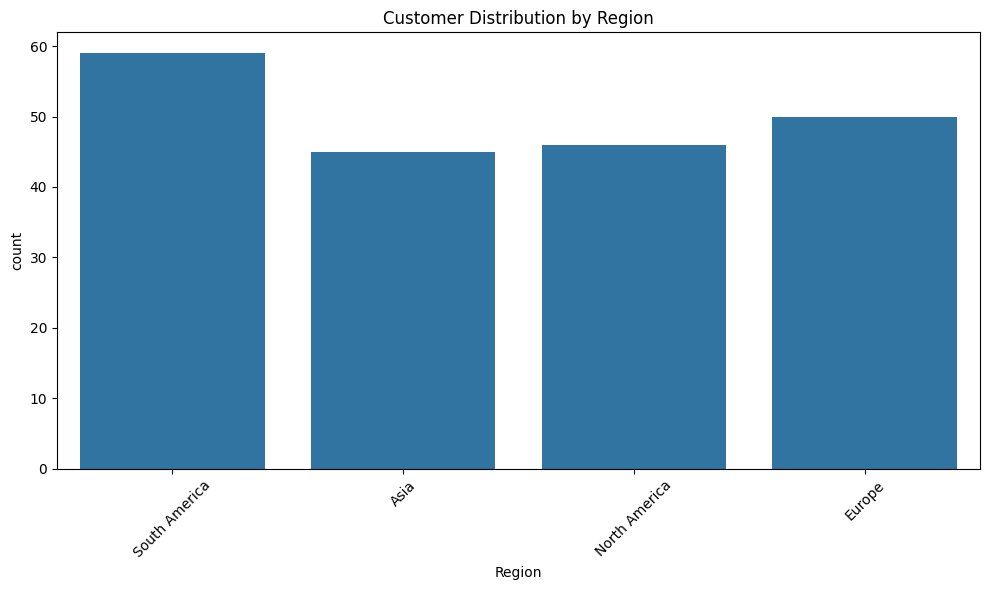

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(data=customer, x='Region')
plt.title('Customer Distribution by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [37]:
category_sales = full_data.groupby('Category').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'TransactionID': 'count'
}).round(2)

print("\nCategory Performance:")
print(category_sales)


Category Performance:
             TotalValue  Quantity  TransactionID
Category                                        
Books         192147.47       681            270
Clothing      166170.66       590            228
Electronics   180783.50       627            254
Home Decor    150893.93       639            248


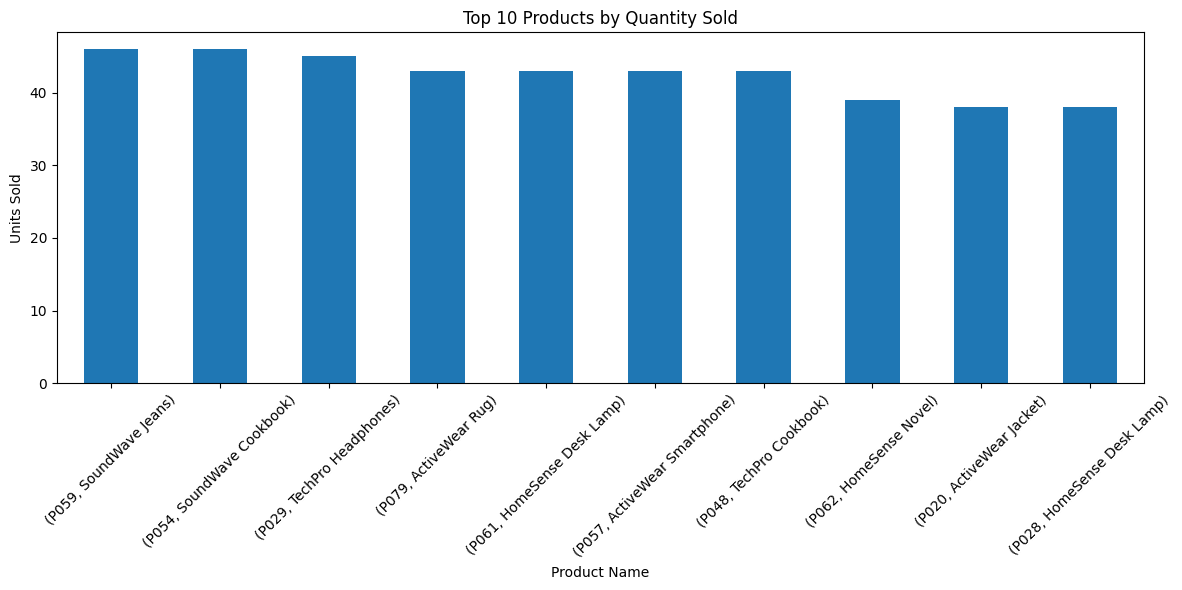

In [38]:
top_products = full_data.groupby(['ProductID', 'ProductName']).agg({
    'Quantity': 'sum',
    'TotalValue': 'sum'
}).sort_values('Quantity', ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_products['Quantity'].plot(kind='bar')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product Name')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


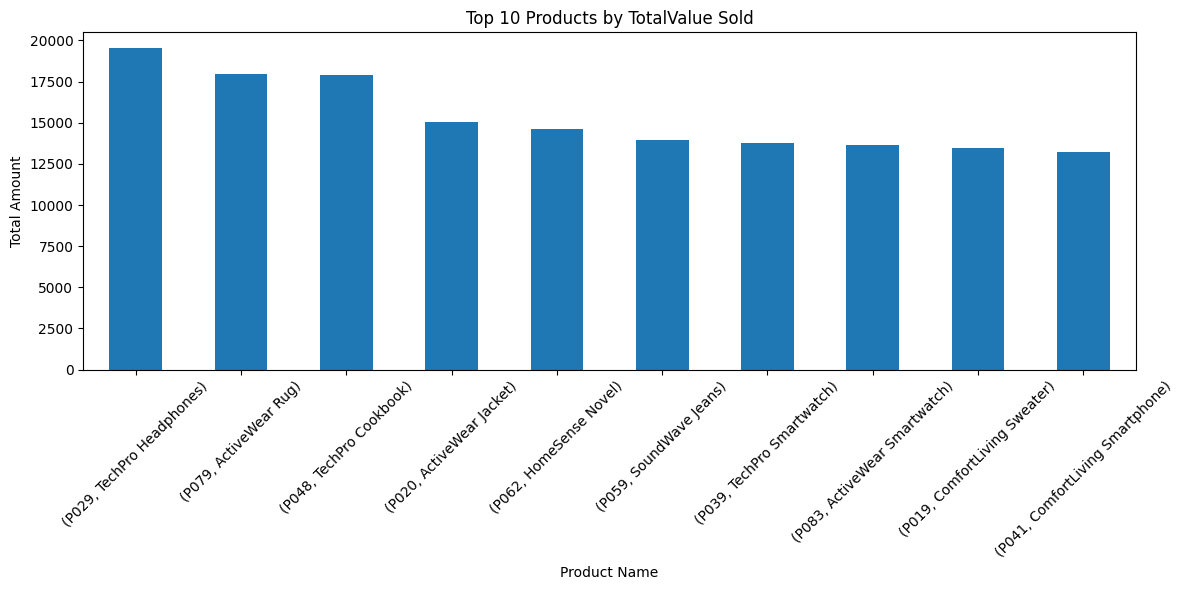

In [72]:
top_revenue_products = full_data.groupby(['ProductID', 'ProductName']).agg({
    'Quantity': 'sum',
    'TotalValue': 'sum'
}).sort_values('TotalValue', ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_revenue_products['TotalValue'].plot(kind='bar')
plt.title('Top 10 Products by TotalValue Sold')
plt.xlabel('Product Name')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

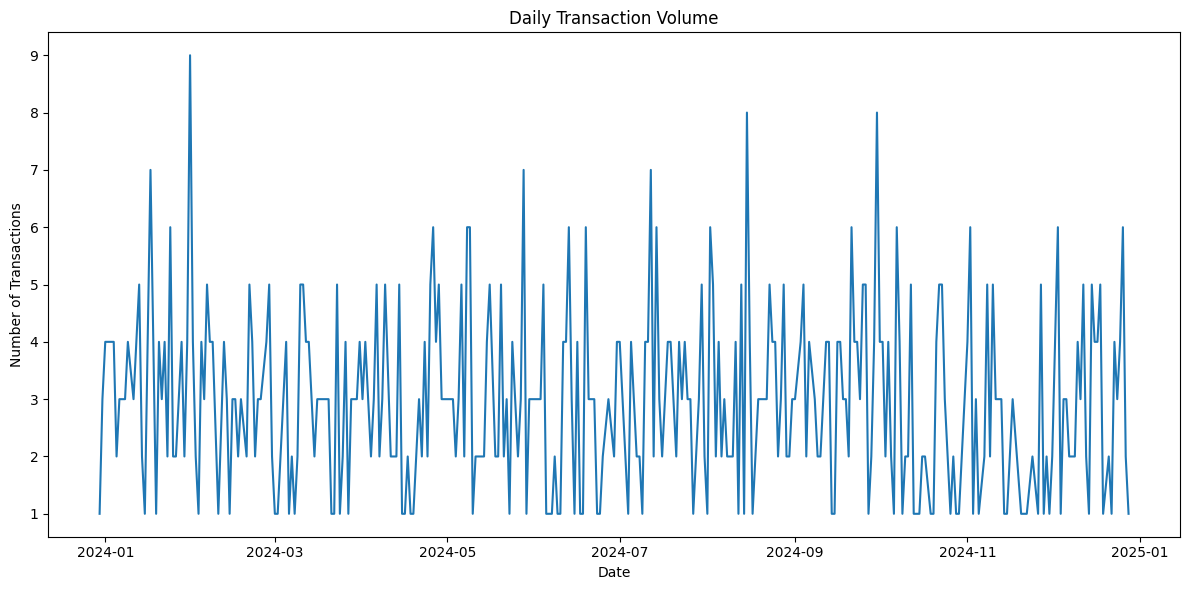

In [42]:
daily_transactions = transaction.groupby(
    transaction['TransactionDate'].dt.date
).size()

plt.figure(figsize=(12, 6))
daily_transactions.plot()
plt.title('Daily Transaction Volume')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()


In [43]:
avg_order_by_region = full_data.groupby('Region')['TotalValue'].agg(['mean', 'count']).round(2)
print("\nAverage Order Value by Region:")
print(avg_order_by_region)


Average Order Value by Region:
                 mean  count
Region                      
Asia           697.59    218
Europe         710.49    234
North America  624.24    244
South America  721.55    304


In [44]:
customer_ltv = full_data.groupby('CustomerID')['TotalValue'].sum().describe()
print("\nCustomer Lifetime Value Statistics:")
print(customer_ltv)


Customer Lifetime Value Statistics:
count      199.000000
mean      3467.314372
std       1832.677958
min         82.360000
25%       2162.040000
50%       3137.660000
75%       4770.225000
max      10673.870000
Name: TotalValue, dtype: float64


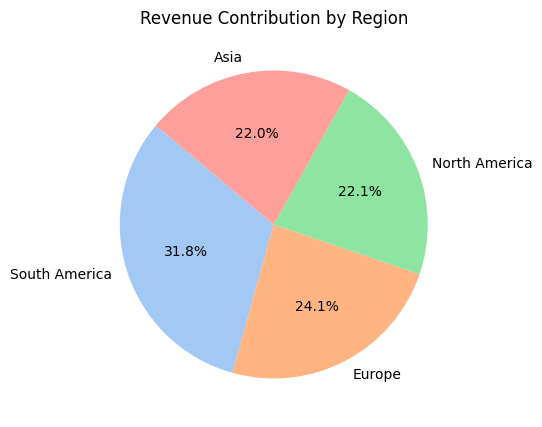

In [57]:
region_revenue = full_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
region_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Revenue Contribution by Region")
plt.ylabel("")
plt.show()


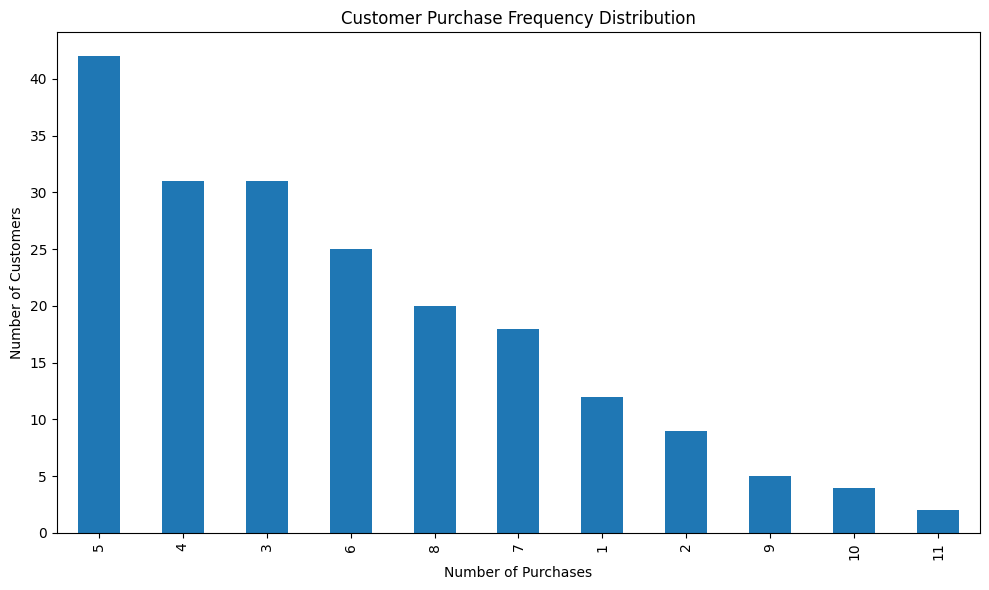

In [45]:
purchase_frequency = transaction.groupby('CustomerID').size().value_counts()
plt.figure(figsize=(10, 6))
purchase_frequency.plot(kind='bar')
plt.title('Customer Purchase Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

In [47]:
total_revenue = transaction['TotalValue'].sum()
avg_order_value = transaction['TotalValue'].mean()
total_customers = len(customer)
active_customers = len(transaction['CustomerID'].unique())
retention_rate = (active_customers / total_customers) * 100


In [49]:
insights = f"""
1. Customer Base and Retention:
   - Total customers: {total_customers:,}
   - Active customers: {active_customers:,}
   - Customer retention rate: {retention_rate:.1f}%

2. Revenue Metrics:
   - Total revenue: {total_revenue:,.2f}
   - Average order value: {avg_order_value:.2f}
   - Total transactions: {len(transaction):,}

3. Product Performance:
   - Best selling category: {category_sales['Quantity'].idxmax()}
   - Total product categories: {len(product['Category'].unique())}
   - Average products per transaction: {full_data['Quantity'].mean():.2f}

4. Regional Performance:
   - Top region by revenue: {full_data.groupby('Region')['TotalValue'].sum().idxmax()}
   - Top region by customer count: {customer['Region'].value_counts().index[0]}

5. Customer Behavior:
   - Average customer lifetime value: {customer_ltv['mean']:.2f}
   - Median purchases per customer: {purchase_frequency.index[0]}
"""

print(insights)


1. Customer Base and Retention:
   - Total customers: 200
   - Active customers: 199
   - Customer retention rate: 99.5%

2. Revenue Metrics:
   - Total revenue: $689,995.56
   - Average order value: $690.00
   - Total transactions: 1,000

3. Product Performance:
   - Best selling category: Books
   - Total product categories: 4
   - Average products per transaction: 2.54

4. Regional Performance:
   - Top region by revenue: South America
   - Top region by customer count: South America

5. Customer Behavior:
   - Average customer lifetime value: $3467.31
   - Median purchases per customer: 5



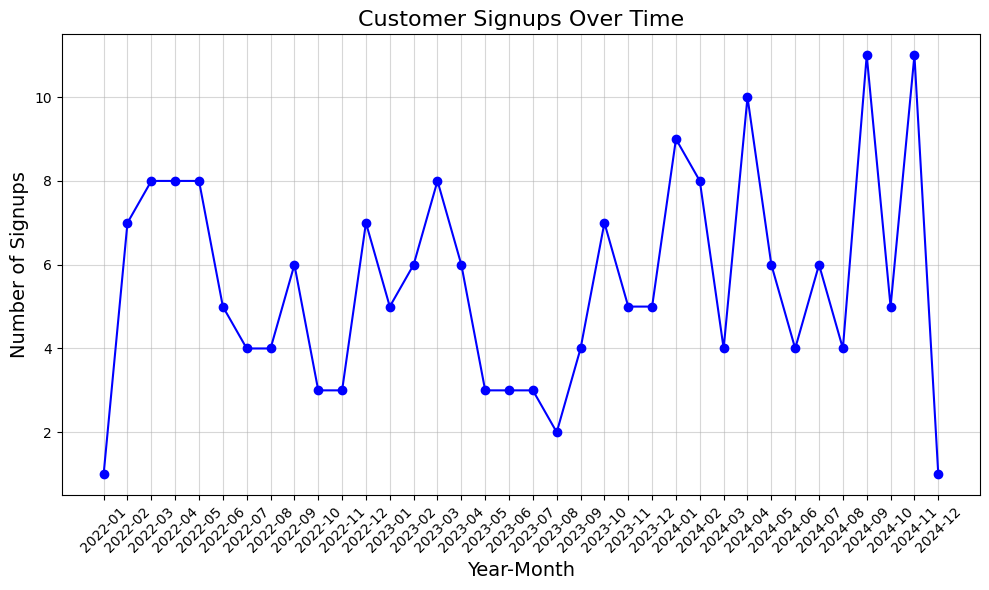

In [58]:
customer['YearMonth'] = customer['SignupDate'].dt.to_period('M')

# Group by 'YearMonth' and count signups
signup_trends = customer.groupby('YearMonth').size()

# Convert to a DataFrame for easier plotting
signup_trends = signup_trends.reset_index(name='Signups')

# Plot the signup trends over time
plt.figure(figsize=(10, 6))
plt.plot(signup_trends['YearMonth'].astype(str), signup_trends['Signups'], marker='o', linestyle='-', color='b')
plt.title('Customer Signups Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Number of Signups', fontsize=14)
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

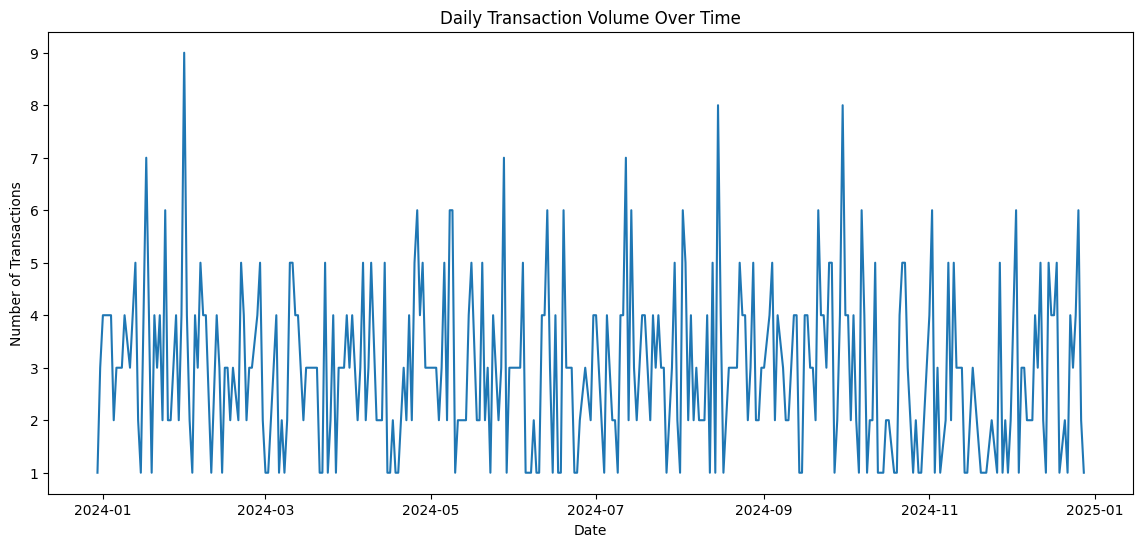

In [62]:
plt.figure(figsize=(14, 6))
full_data['TransactionDate'].dt.date.value_counts().sort_index().plot()
plt.title('Daily Transaction Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

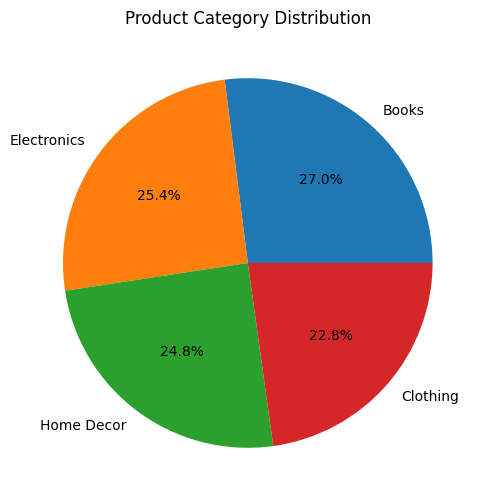

In [65]:
plt.figure(figsize=(12, 6))
full_data['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Product Category Distribution')
plt.ylabel('')
plt.show()


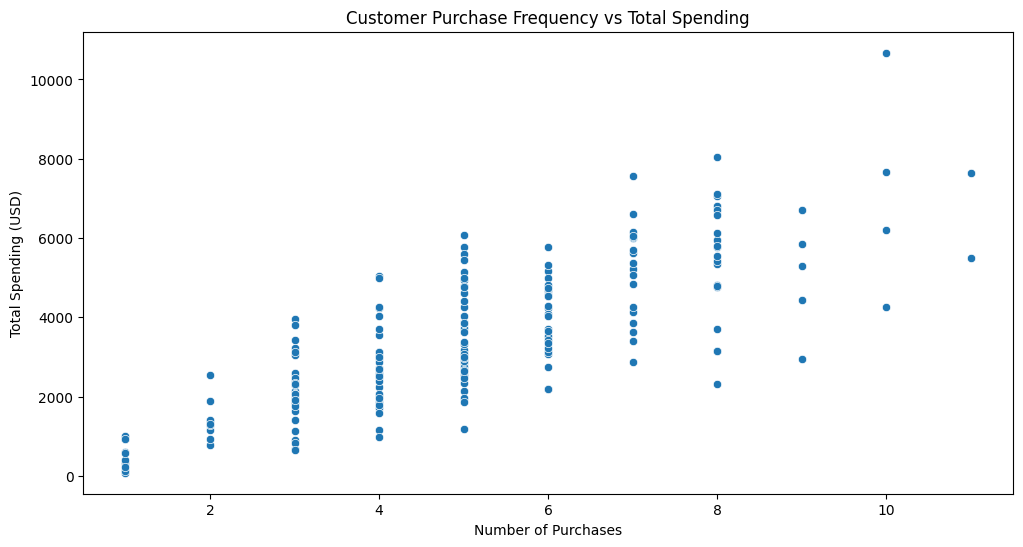

In [66]:
customer_activity = full_data.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).rename(columns={
    'TransactionID': 'PurchaseCount',
    'TotalValue': 'TotalSpend',
    'Quantity': 'TotalItems'
})

plt.figure(figsize=(12, 6))
sns.scatterplot(data=customer_activity, x='PurchaseCount', y='TotalSpend')
plt.title('Customer Purchase Frequency vs Total Spending')
plt.xlabel('Number of Purchases')
plt.ylabel('Total Spending (USD)')
plt.show()

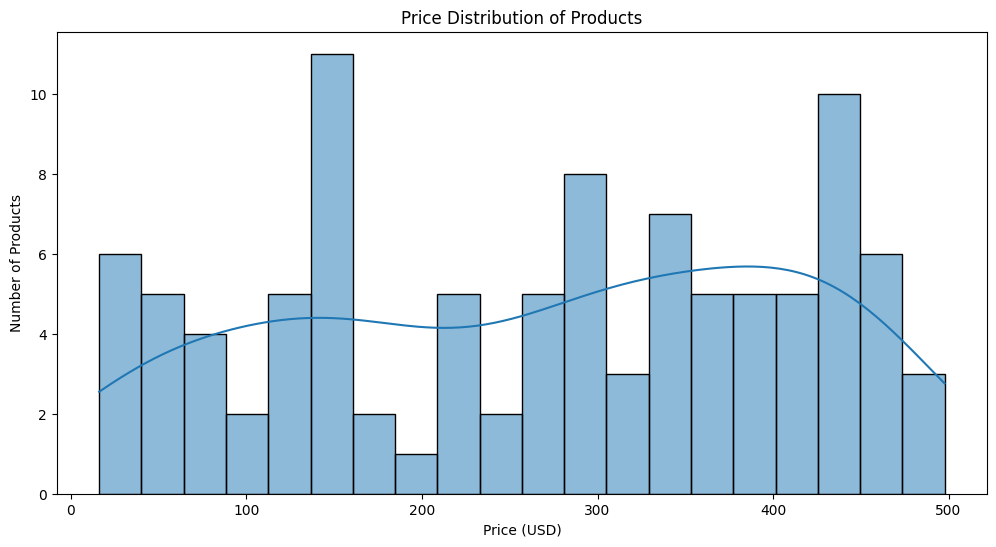

In [67]:
plt.figure(figsize=(12, 6))
sns.histplot(product['Price'], bins=20, kde=True)
plt.title('Price Distribution of Products')
plt.xlabel('Price (USD)')
plt.ylabel('Number of Products')
plt.show()

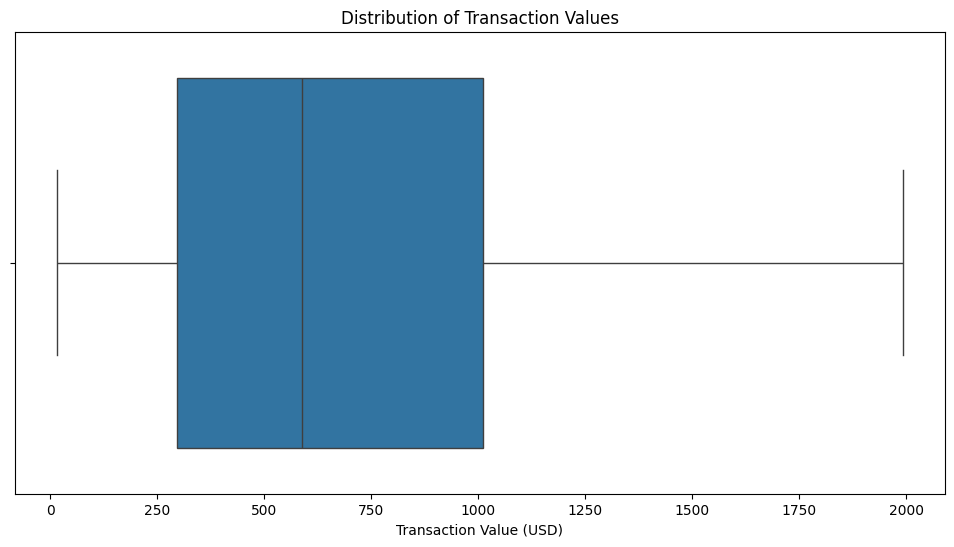

In [70]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=full_data['TotalValue'])
plt.title('Distribution of Transaction Values')
plt.xlabel('Transaction Value (USD)')
plt.show()

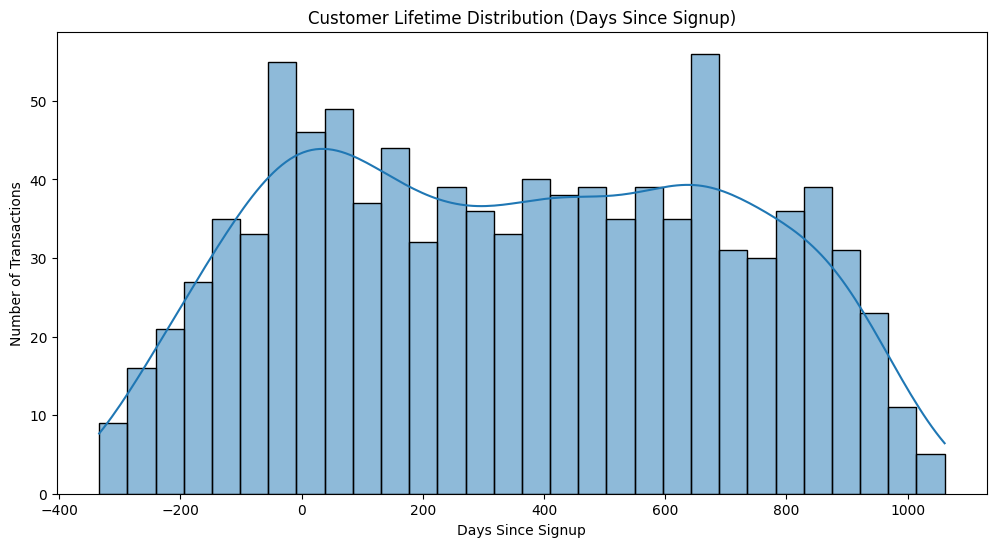

In [71]:
full_data['CustomerLifetime'] = (full_data['TransactionDate'] - full_data['SignupDate']).dt.days
plt.figure(figsize=(12, 6))
sns.histplot(full_data['CustomerLifetime'], bins=30, kde=True)
plt.title('Customer Lifetime Distribution (Days Since Signup)')
plt.xlabel('Days Since Signup')
plt.ylabel('Number of Transactions')
plt.show()